# Data

The data that we will use for demonstration contains classification accuracies (in percents) of 5 learning algorithms ran on 54 data sets tested with 10 repetitions of 10-fold cross validation. The presented functions would work on other performance scores, too. The correlated t-test (comparison of two classifiers on a single data set) assumes that the data was collected using cross validation; repeating it 10 times is not necessary. The sign rank test (two classifiers on multiple data set) does not require scores from cross validation.

We will use a simple module `data` with a function `get_data` to retrieve the data. Its first argument is a name of a classifier or a list of names. The second argument is a name of a data set or a list of names; if the argument omitted, we get the data for all data sets. For instance `data.get_data("nbc", "sonar")` returns the performance of classifier *nbc* on 10 runs of 10-fold cross validation, that is, an array with 100 numbers. `data.get_data("nbc")` returns a 54x100 array with results for all 54 data sets.

An optional argument `aggregate` can be set to `True` to compute the average performance for each dataset. `data.get_data("nbc", "sonar", aggregate=True)` returns a single number, and `data.get_data("nbc", aggregate=True)` returns an array with 54 numbers, that is average performance of *nbc* on 54 data sets.

Further details and examples for those who may find this function useful for their work are described at the end of the guide. They are not necessary for following the guide, though.

# Comparison of two classifiers on a single data set



Two classifiers can be compared on a single dataset by using a correlated t-test, `correlated_t(x, y, rope=0, runs=1)`. Arguments `x` and `y` contain the scores of the two classifiers measured by cross validation. If `y` is omitted, `x` must contain the differences. If cross validation is run multiple times, set the `runs` argument accordingly.

The function uses Bayesian interpretation of the p-value to compute and return the probabilities that `x` is better than `y`, and the opposite. See [A Bayesian approach for comparing cross-validated algorithms on multiple data sets](http://link.springer.com/article/10.1007%2Fs10994-015-5486-z>) (G. Corani and A. Benavoli, Mach Learning 2015) for details.

For convenience, function `correlated_t` can also be called as `two_on_single`.

Let us compare the performance of *nbc* and *aode* on *sonar*.

In [1]:
import data

nbc = data.get_data("nbc", "sonar")
aode = data.get_data("aode", "sonar")
nbc

array([ 94.203,  92.754,  95.652,  91.176,  92.647,  91.176,  92.647,
        92.647,  86.765,  91.176,  91.304,  94.203,  88.406,  98.529,
        95.588,  97.059,  91.176,  89.706,  85.294,  89.706,  97.101,
        92.754,  94.203,  92.647,  92.647,  91.176,  88.235,  97.059,
        94.118,  88.235,  92.754,  95.652,  89.855,  94.118,  88.235,
        91.176,  94.118,  92.647,  94.118,  91.176,  91.304,  88.406,
        91.304,  92.647,  91.176,  85.294,  92.647,  97.059,  92.647,
        95.588,  84.058,  97.101,  94.203,  95.588,  91.176,  92.647,
        92.647,  91.176,  89.706,  89.706,  89.855,  92.754,  91.304,
        94.118,  89.706,  92.647,  91.176,  98.529,  86.765,  95.588,
        91.304,  92.754,  97.101,  94.118,  86.765,  98.529,  91.176,
        82.353,  94.118,  97.059,  88.406,  86.957,  91.304,  94.118,
        97.059,  92.647,  92.647,  89.706,  92.647,  94.118,  94.203,
        94.203,  92.754,  95.588,  89.706,  88.235,  94.118,  94.118,
        88.235,  91.

`nbc` and `aode` thus contain data on 10 repetitions of 10-fold cross validation.

In [2]:
import numpy as np

np.mean(nbc)

92.195820000000026

In [3]:
np.mean(aode)

93.308150000000026

*aode* is better than *nbc* - on these samples. But what is the probability that is better (on this data) in general?

In [4]:
import baycomp

baycomp.two_on_single(nbc, aode, runs=10)

(0.024471493163386815, 0.97552850683661319)

We set `runs=10` because we repeated the cross validation ten times. If you run it just once, skip the argument.

So, there is a 97.5 % probability that *aode* is better than *nbc*. Yet, performances of the two models are however rather close: 92.2 vs. 93.3. What is the probability that although *aode* is better, the actual difference is practically insignificant?

The function has one more argument, `rope`, which defines the *region of practical equivalence*. Say that we would dismiss the difference below 0.5 as negligible. If we add an argument `rope=0.5`, the function will return a triplet instead of a tuple: the probability that *nbc* is better by more than 0.5, the probability that none of the two outperforms the other by more than 0.5, and the probability that *aode* is better by more than 0.5.

In [5]:
baycomp.two_on_single(nbc, aode, runs=10, rope=0.5)

(0.0023685180162288377, 0.13517773046085313, 0.86245375152291803)

There is a 13.5 % probability that the performances of the two methods differ by less than 0.5.

Note that `rope` is given in the same units as `x` and `y`. If `x` and `y` express the classification accuracy in percents, that is, on the scale from 0 to 100, `rope` is on the same scale. If classification accuracy was on the scale from 0 to 1, the equivalent `rope` would be 0.005. For, for instances, AUC, `rope` would specify the negligible difference in AUCs.

Now, let us see these results graphically. Function `plot_posterior_t` accepts the same arguments as above, and, optionally, the names of the two classifiers, so it can show their names under the plot.

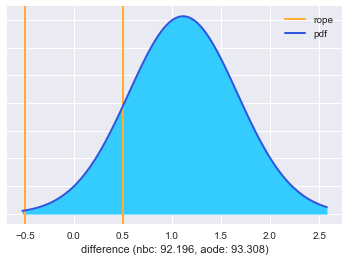

In [6]:
%matplotlib inline

fig = baycomp.plot_posterior_t(nbc, aode, runs=10, rope=0.5, names=("nbc", "aode"))

Most of the probability mass is on the right side, where *aode* is better. The rest of the mass is in the rope.

We can play with other classifiers and datasets, too.

In [7]:
classifiers = ("j48", "aode")
x, y = data.get_data(classifiers, "iris")
baycomp.two_on_single(x, y, runs=10, rope=0.5)

(0.51556747093391908, 0.37032204786414769, 0.11411048120193321)

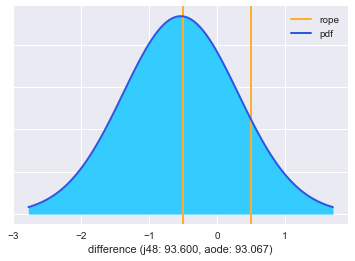

In [8]:
fig = baycomp.plot_posterior_t(x, y, runs=10, rope=0.5, names=classifiers)

# Comparison of two classifiers on multiple data sets

The sign test does not take into account the variance across runs of cross validation, so we will need mean performances for each data sets.

In [9]:
nbc, aode = data.get_data(("nbc", "aode"), aggregate=True)

The two arrays now contain the average performance of *nbc* and *aode* across all 54 data sets.

In [10]:
nbc

array([ 95.94595,  71.39521,  83.3377 ,  49.98591,  76.16673,  86.21744,
        86.21744,  81.87252,  52.8114 ,  75.04   ,  71.93504,  50.12499,
        72.03123,  60.     ,  83.6875 ,  84.36091,  98.31118,  89.40237,
        93.33322,  87.79086,  87.59993,  56.84723,  85.09998,  62.66532,
        74.63639,  96.38929,  95.76072,  90.29939,  92.16903,  93.37478,
        80.41671,  87.72004,  75.26002,  68.11142,  47.19786,  91.14715,
        85.59372,  86.62217,  93.81435,  76.71185,  92.19582,  89.82622,
        79.21932,  95.41686,  59.03334,  62.06667,  46.32085,  58.78783,
        79.968  ,  64.92861,  98.70582,  97.19638,  57.61428,  93.98181])

In [11]:
len(nbc)

54

This array thus corresponds columns of tables that we usually see in papers, with classifiers in columns and data sets in rows.

We compare performances of the two methods by function `signtest`, also called `two_on_multiple`. The function has arguments `x`, `y` and `rope`, which have the same meaning as above.

In [12]:
baycomp.two_on_multiple(nbc, aode)

(0.0, 1.0)

*nbc* is just embarassingly worse. Let's take another pair instead. :)

In [13]:
j48, aode = data.get_data(("j48", "aode"), aggregate=True)
baycomp.two_on_multiple(j48, aode)

(0.04462, 0.95538000000000001)

And now for some `rope`. The meaning of `rope` here is different. XXXXXXX EXPLAIN XXXXX

In [14]:
baycomp.two_on_multiple(j48, aode, rope=0.5)

(0.04496, 0.0054000000000000003, 0.94964000000000004)

The function has two more arguments.

`prior` gives the strength of prior that is put on the rope region. Default is `1`. To put the prior on another region, specify it as a tuple, say `prior=(2, baycomp.LEFT)`.

Let us put a (very strong) prior on J48.

In [15]:
baycomp.two_on_multiple(j48, aode, rope=0.2, prior=(10, baycomp.LEFT))

(0.21456, 0.0, 0.78544000000000003)

The function uses Monte Carlo sampling with a sample size of 50000. You can change this by setting the argument `nsamples`.

And now for visualization. Function `plot_posterior_sign` takes the same arguments as above, plus `names` that gives the names of the two methods.

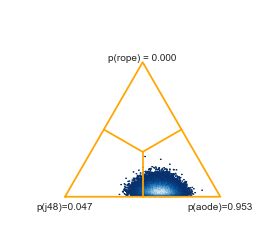

In [16]:
classifiers = ("j48", "aode")
fig = baycomp.plot_posterior_sign(j48, aode, names=classifiers)

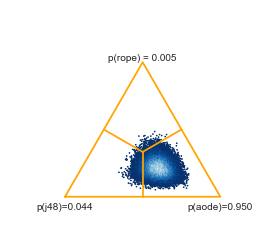

In [17]:
fig = baycomp.plot_posterior_sign(j48, aode, rope=0.5, names=classifiers)

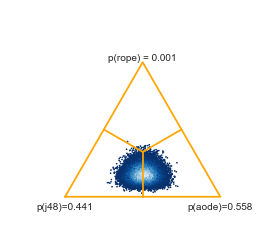

In [18]:
fig = baycomp.plot_posterior_sign(j48, aode, rope=0.5, prior=(10, baycomp.LEFT), names=classifiers)

# Technical details

## Dependencies

The module requires *numpy* and *scipy*.

Plotting functions also need *matplotlib*. The module will attempt to import *seaborn* to enhance the visualizations.

## Test data

For the purpose of this guide, we implemented a simple module `data` for loading the data with which we can play. Functions `get_classifiers()` and `get_datasets()` return the names of classifiers and data sets.

In [19]:
import data

data.get_classifiers()

['nbc', 'aode', 'hnb', 'j48', 'j48gr']

In [20]:
data.get_datasets()

['anneal',
 'audiology',
 'cleeland-14',
 'cmc',
 'contact-lenses',
 'credit',
 'credit',
 'ecoli',
 'eucalyptus',
 'german-credit',
 'glass',
 'grub-damage',
 'haberman',
 'hayes-roth',
 'hepatitis',
 'hungarian-14',
 'hypothyroid',
 'ionosphere',
 'iris',
 'kr-s-kp',
 'labor',
 'lier-disorders',
 'lymphography',
 'monks',
 'monks1',
 'monks3',
 'mushroom',
 'nursery',
 'optdigits',
 'owel',
 'page-blocks',
 'pasture-production',
 'pendigits',
 'pima-diabetes',
 'postoperatie',
 'primary-tumor',
 'segment',
 'solar-flare-C',
 'solar-flare-X',
 'solar-flare-m',
 'sonar',
 'soybean',
 'spambase',
 'spect-reordered',
 'splice',
 'squash-stored',
 'squash-unstored',
 'tae',
 'waveform',
 'white-clover',
 'wine',
 'wisconsin-breast-cancer',
 'yeast',
 'zoo']

Method `get_data` gives us the actual data.

In [21]:
data.get_data("nbc", "sonar")

array([ 94.203,  92.754,  95.652,  91.176,  92.647,  91.176,  92.647,
        92.647,  86.765,  91.176,  91.304,  94.203,  88.406,  98.529,
        95.588,  97.059,  91.176,  89.706,  85.294,  89.706,  97.101,
        92.754,  94.203,  92.647,  92.647,  91.176,  88.235,  97.059,
        94.118,  88.235,  92.754,  95.652,  89.855,  94.118,  88.235,
        91.176,  94.118,  92.647,  94.118,  91.176,  91.304,  88.406,
        91.304,  92.647,  91.176,  85.294,  92.647,  97.059,  92.647,
        95.588,  84.058,  97.101,  94.203,  95.588,  91.176,  92.647,
        92.647,  91.176,  89.706,  89.706,  89.855,  92.754,  91.304,
        94.118,  89.706,  92.647,  91.176,  98.529,  86.765,  95.588,
        91.304,  92.754,  97.101,  94.118,  86.765,  98.529,  91.176,
        82.353,  94.118,  97.059,  88.406,  86.957,  91.304,  94.118,
        97.059,  92.647,  92.647,  89.706,  92.647,  94.118,  94.203,
        94.203,  92.754,  95.588,  89.706,  88.235,  94.118,  94.118,
        88.235,  91.

The data was collected with 10 runs of 10-fold cross-validation. To get a single number, we add a keyword argument `aggregate`.

In [22]:
data.get_data("nbc", "sonar", aggregate=True)

array(92.19582000000003)

The first two arguments can be a name of a classifier or a data set, a sequence of names, or `...`. The latter is the default, and gives the data for all classifiers or data sets.

In [23]:
data.get_data(("nbc", "aode"), ("sonar", "wine", "tae", "monks3"), aggregate=True)

array([[ 92.19582,  98.70582,  58.78783,  96.38929],
       [ 93.30815,  98.2058 ,  75.69693,  96.73215]])

In [24]:
data.get_data("nbc", aggregate=True)

array([ 95.94595,  71.39521,  83.3377 ,  49.98591,  76.16673,  86.21744,
        86.21744,  81.87252,  52.8114 ,  75.04   ,  71.93504,  50.12499,
        72.03123,  60.     ,  83.6875 ,  84.36091,  98.31118,  89.40237,
        93.33322,  87.79086,  87.59993,  56.84723,  85.09998,  62.66532,
        74.63639,  96.38929,  95.76072,  90.29939,  92.16903,  93.37478,
        80.41671,  87.72004,  75.26002,  68.11142,  47.19786,  91.14715,
        85.59372,  86.62217,  93.81435,  76.71185,  92.19582,  89.82622,
        79.21932,  95.41686,  59.03334,  62.06667,  46.32085,  58.78783,
        79.968  ,  64.92861,  98.70582,  97.19638,  57.61428,  93.98181])

The module reads the data from a file *accuracies.txt*, which has a rather obvious format (check it). You can easily adapt the module to read your data instead.